### Importing Libraries

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading Model

In [7]:
model = tf.keras.models.load_model('trained_model.keras')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 127, 127, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 128)       7

### Visualizing Single Image Test

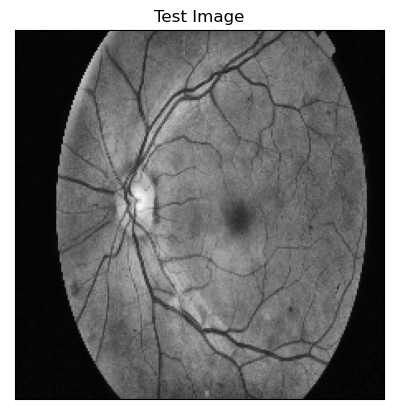

In [39]:
import cv2
import matplotlib.pyplot as plt

image_path = "dataset/test/Moderate/Moderate_9.jpg"  # Use forward slashes for the file path

# Reading Image
img = cv2.imread(image_path)

# Convert BGR to RGB format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])  # Hide x-axis ticks
plt.yticks([])  # Hide y-axis ticks
plt.show()


## Testing Model

In [40]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256,256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch since model is trained like that only(batch_size = 32)
print(input_arr.shape)

(1, 256, 256, 3)


In [41]:
prediction = model.predict(input_arr)
prediction,prediction.shape

(array([[4.1549588e-03, 9.9513584e-01, 1.1319614e-04, 1.0800726e-04,
         4.8786818e-04]], dtype=float32),
 (1, 5))

In [42]:
result_index = np.argmax(prediction)
result_index

1

In [43]:
class_name = ['Mild', 'Moderate', 'Normal', 'Proliferate', 'Severe']

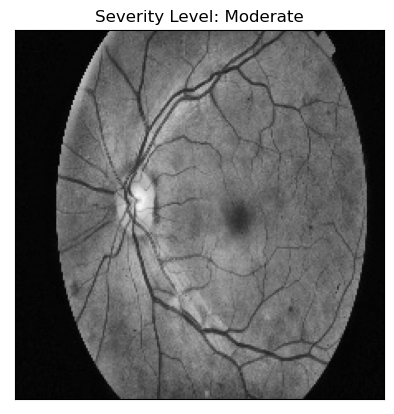

In [44]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Severity Level: {model_prediction}")
plt.xticks([])  # Hide x-axis ticks
plt.yticks([])  # Hide y-axis ticks
plt.show()

In [45]:
model_prediction

'Moderate'